In [ ]:
import os
import numpy as np
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model

In [ ]:
# Load the VGG16 model (pre-trained on ImageNet) without fully connected layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Create a model using VGG16 until a specific layer to extract features
feature_extractor = Model(inputs=base_model.input, outputs=base_model.get_layer('block5_conv2').output)

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

In [ ]:
# Function to preprocess images and extract features using the CNN model
def extract_cnn_features(image_path):
    img = image.load_img(image_path, target_size=(128, 128))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    features = feature_extractor.predict(img_array)
    features = features.flatten()  # Flatten to create a feature vector
    return features

In [ ]:
# Path to the folder containing movie posters
posters_folder = '/content/drive/MyDrive/MLP-1M'

# Extract CNN features for all posters in the folder
poster_features = {}
for filename in os.listdir(posters_folder):
    if filename.endswith(".jpg"):
        poster_path = os.path.join(posters_folder, filename)
        features = extract_cnn_features(poster_path)
        poster_features[filename] = features



1/1 [==============================] - 0s 27ms/step


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

def recommend_similar_movies(target_poster, poster_features):
    # Retrieve the features of the target poster
    target_features = poster_features.get(target_poster)
    if target_features is None:
        print("Target poster not found.")
        return []

    # Calculate similarity scores between the target poster and other posters
    similarity_scores = {}
    for poster, features in poster_features.items():
        if poster != target_poster:
            similarity = cosine_similarity([target_features], [features])[0][0]
            similarity_scores[poster] = similarity

    # Sort movies by similarity scores in descending order
    recommended_movies = sorted(similarity_scores.items(), key=lambda x: x[1], reverse=True)

    return recommended_movies


Movie: 1473.jpg, Similarity Score: 0.5497295260429382
Movie: 1531.jpg, Similarity Score: 0.516921877861023
Movie: 804.jpg, Similarity Score: 0.514301061630249
Movie: 1561.jpg, Similarity Score: 0.502808690071106
Movie: 2587.jpg, Similarity Score: 0.49927905201911926
Movie: 3124.jpg, Similarity Score: 0.4953174889087677
Movie: 2245.jpg, Similarity Score: 0.48800262808799744
Movie: 550.jpg, Similarity Score: 0.4879528880119324
Movie: 3844.jpg, Similarity Score: 0.48768556118011475
Movie: 3130.jpg, Similarity Score: 0.4870002865791321


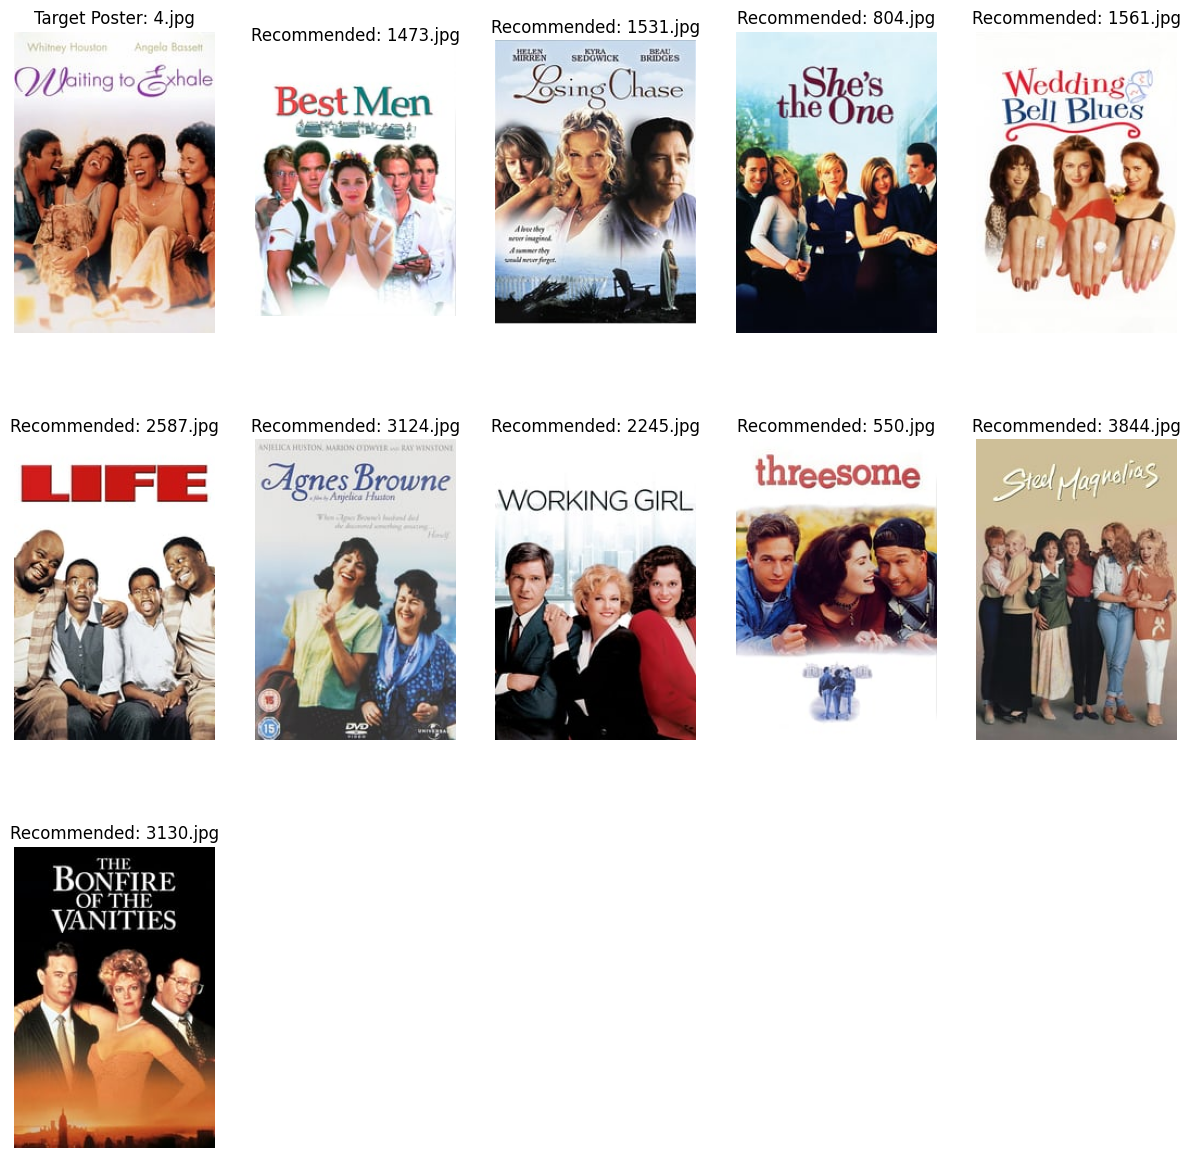

In [ ]:
import os
import matplotlib.pyplot as plt

# Function to display images
def display_images(images, titles, cols=5):
    rows = (len(images) + cols - 1) // cols
    plt.figure(figsize=(15, 5 * rows))
    for i, (image, title) in enumerate(zip(images, titles), 1):
        plt.subplot(rows, cols, i)
        plt.imshow(image)
        plt.title(title)
        plt.axis('off')
    plt.show()

# Replace 'target_poster.jpg' with the filename of the movie poster you want recommendations for
target_movie_poster = '4.jpg'

# Get recommendations based on visual similarity to the target movie poster
recommendations = recommend_similar_movies(target_movie_poster, poster_features)

# Print top recommended movies
top_recommendations = recommendations[:10]  # Adjust the number of recommendations you want to display
for movie, similarity_score in top_recommendations:
    print(f"Movie: {movie}, Similarity Score: {similarity_score}")

# Display the target poster and top recommended posters
poster_folder = '/content/drive/MyDrive/MLP-1M'  # Path to the folder containing posters
images = []
titles = []
images.append(plt.imread(os.path.join(poster_folder, target_movie_poster)))
titles.append(f"Target Poster: {target_movie_poster}")

for recommended_movie, _ in top_recommendations:
    recommended_image = plt.imread(os.path.join(poster_folder, recommended_movie))
    images.append(recommended_image)
    titles.append(f"Recommended: {recommended_movie}")

# Display the images
display_images(images, titles)


**Save Features**

In [ ]:
import pickle

# File path to save the extracted visual features
features_file_path = '/content/drive/MyDrive/FYP/features_vgg16.pickle'

# Save the poster_features dictionary to a file using pickle
with open(features_file_path, 'wb') as file:
    pickle.dump(poster_features, file)

print(f"Extracted visual features saved to {features_file_path}")


Extracted visual features saved to /content/drive/MyDrive/FYP/features_vgg16.pickle
